Importing libraries

In [18]:
# python basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string, math, os, re, time, random

from tqdm import tqdm

# visualizations
plt.style.use('ggplot')

# natural language processing
from collections import defaultdict
import wordcloud

# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

# for neural nets
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Reading dataset

In [19]:
df = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 7\twitter_disaster_task2.csv')


Part 2: Feature Engineering and Model Selection

Task: Feature Engineering


●	Extract relevant features from the text data, such as word frequencies, TF-IDF scores, and sentiment analysis.

Word Frequencies and TF-IDF Scores

In [20]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform text data using CountVectorizer
X_count = count_vectorizer.fit_transform(df['text'])

# Fit and transform text data using TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Convert transformed matrices to DataFrame (for demonstration)
df_count = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display word frequencies (CountVectorizer) and TF-IDF scores (TfidfVectorizer)
print("Word Frequencies (CountVectorizer):\n", df_count)
print()
print("TF-IDF Scores (TfidfVectorizer):\n", df_tfidf.head())


Word Frequencies (CountVectorizer):
       00  000  0000  007npen6lg  00cy9vxeff  00end  00pm  01  02  0215  ...  \
0      0    0     0           0           0      0     0   0   0     0  ...   
1      0    0     0           0           0      0     0   0   0     0  ...   
2      0    0     0           0           0      0     0   0   0     0  ...   
3      0    1     0           0           0      0     0   0   0     0  ...   
4      0    0     0           0           0      0     0   0   0     0  ...   
...   ..  ...   ...         ...         ...    ...   ...  ..  ..   ...  ...   
7608   0    0     0           0           0      0     0   0   0     0  ...   
7609   0    0     0           0           0      0     0   0   0     0  ...   
7610   0    0     0           0           0      0     0   1   0     0  ...   
7611   0    0     0           0           0      0     0   0   0     0  ...   
7612   0    0     0           0           0      0     0   0   0     0  ...   

      ûò  ûò80

Sentiment Analysis

In [21]:
!pip install textblob

In [22]:
from textblob import TextBlob

df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment)

df['polarity'] = df['text_sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['text_sentiment'].apply(lambda x: x.subjectivity)

print(df[['text', 'polarity', 'subjectivity']])


                                                   text  polarity  \
0     Our Deeds are the Reason of this #earthquake M... -0.100000   
1        Forest fire near La Ronge Sask. Canada unknown  0.000000   
2     All residents asked to 'shelter in place' are ... -0.045833   
3     13,000 people receive #wildfires evacuation or... -0.100000   
4     Just got sent this photo from Ruby #Alaska as ... -0.100000   
...                                                 ...       ...   
7608  Two giant cranes holding a bridge collapse int... -0.050000   
7609  @aria_ahrary @TheTawniest The out of control w...  0.066667   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt... -0.100000   
7611  Police investigating after an e-bike collided ... -0.206944   
7612  The Latest: More Homes Razed by Northern Calif...  0.300000   

      subjectivity  
0         0.600000  
1         0.500000  
2         0.458333  
3         0.600000  
4         0.600000  
...            ...  
7608      0.800000  
760

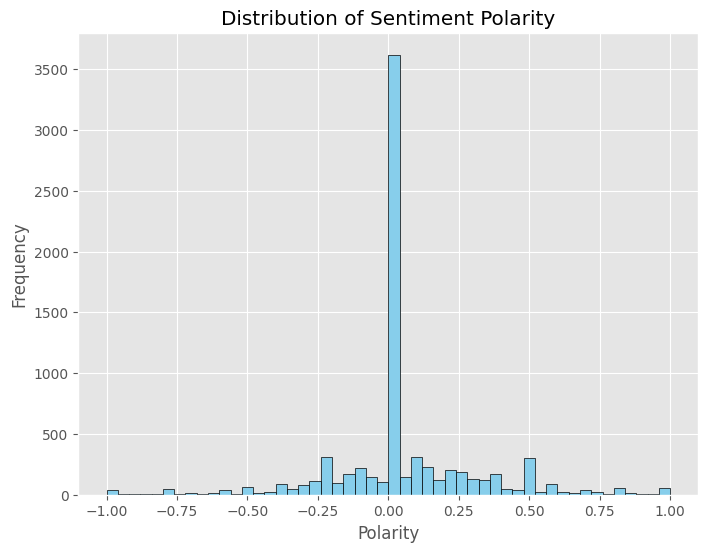

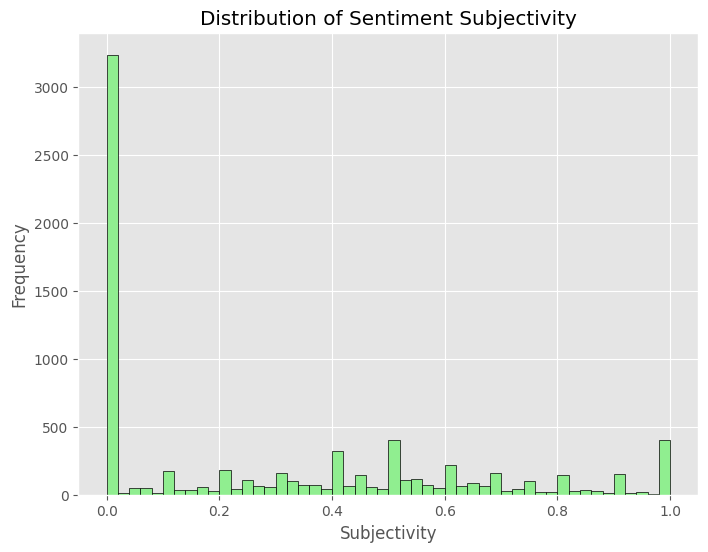

In [23]:
import matplotlib.pyplot as plt

# Plot histogram for sentiment polarity
plt.figure(figsize=(8, 6))
plt.hist(df['polarity'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.grid(True)
plt.show()

# Plot histogram for sentiment subjectivity
plt.figure(figsize=(8, 6))
plt.hist(df['subjectivity'], bins=50, color='lightgreen', edgecolor='black')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Subjectivity')
plt.grid(True)
plt.show()


Sentiment Polarity and Sentiment Subjectivity both are maximum at point 0

Integration into Feature Extraction Pipeline

In [24]:
# Initialize TfidfVectorizer for TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform text data using TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Perform sentiment analysis using TextBlob
sentiment_scores = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a DataFrame with TF-IDF scores and sentiment analysis results
df_features = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_features['sentiment_polarity'] = sentiment_scores

# Display the combined feature matrix with TF-IDF and sentiment analysis features
print("Combined Feature Matrix:\n", df_features)

Combined Feature Matrix:
        00       000  0000  007npen6lg  00cy9vxeff  00end  00pm        01   02  \
0     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
1     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
2     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
3     0.0  0.401048   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
4     0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
...   ...       ...   ...         ...         ...    ...   ...       ...  ...   
7608  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7609  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7610  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.296664  0.0   
7611  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   
7612  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.000000  0.0   

 

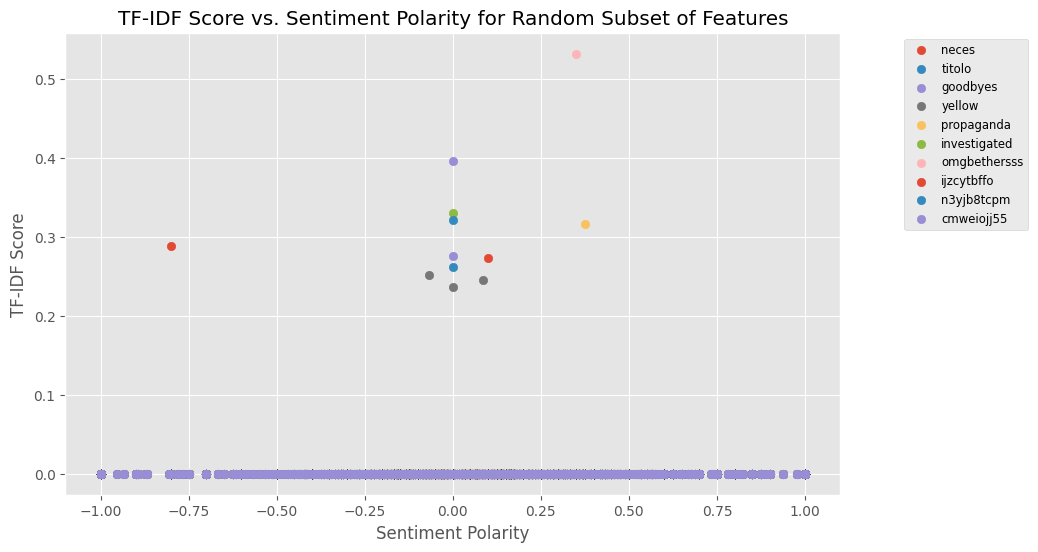

In [74]:
import random

# Select a random subset of features to plot
num_features_to_plot = 10  # Adjust this as needed
random_features = random.sample(list(df_features.columns[:-1]), num_features_to_plot)

# Plot scatter plot for TF-IDF scores vs. sentiment polarity for each feature
plt.figure(figsize=(10, 6))
for feature in random_features:
    plt.scatter(df_features['sentiment_polarity'], df_features[feature], label=feature)
plt.xlabel('Sentiment Polarity')
plt.ylabel('TF-IDF Score')
plt.title('TF-IDF Score vs. Sentiment Polarity for Random Subset of Features')
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()



Only 2 or 3 subsets are at points other than 0

●	Consider using pre-trained word embeddings like Word2Vec or GloVe to capture semantic meanings.

In [26]:
import gensim.downloader as api

# Download and load the pre-trained Word2Vec model
w2v_model = api.load('word2vec-google-news-300')


In [27]:
def get_token_embeddings(tokens, w2v_model):
    embeddings = []
    for token in tokens:
        if token in w2v_model:
            embeddings.append(w2v_model[token])
        else:
            # Handle out-of-vocabulary words (use a zero vector)
            embeddings.append([0] * w2v_model.vector_size)
    return embeddings


In [28]:
# Applying word embedding to tokenized text
df['embeddings'] = df['tokenized'].apply(lambda x: get_token_embeddings(x, w2v_model))

In [29]:

# Display DataFrame with tokenized text and corresponding embeddings
print(df[['tokenized', 'embeddings']])


                                              tokenized  \
0     ['Deeds', 'Reason', 'earthquake', 'ALLAH', 'Fo...   
1     ['Forest', 'fire', 'near', 'Ronge', 'Sask', 'C...   
2     ['residents', 'asked', 'shelter', 'place', 'no...   
3     ['people', 'receive', 'wildfires', 'evacuation...   
4     ['Just', 'sent', 'photo', 'Ruby', 'Alaska', 's...   
...                                                 ...   
7608  ['giant', 'cranes', 'holding', 'bridge', 'coll...   
7609  ['ariaahrary', 'TheTawniest', 'control', 'wild...   
7610                   ['Volcano', 'Hawaii', 'unknown']   
7611  ['Police', 'investigating', 'ebike', 'collided...   
7612  ['Latest', 'More', 'Homes', 'Razed', 'Northern...   

                                             embeddings  
0     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4

●	Experiment with additional features like tweet length, presence of hashtags, or user mentions.

In [30]:
# Calculate tweet length (number of words)
df['tweet_length'] = df['tokenized'].apply(len)


In [31]:
df['tweet_length']

0        64
1        64
2       133
3        83
4        95
       ... 
7608     82
7609    140
7610     32
7611    160
7612     93
Name: tweet_length, Length: 7613, dtype: int64

In [32]:
# Check if tweet contains hashtags
df['has_hashtags'] = df['text'].apply(lambda x: 1 if '#' in x else 0)


In [33]:
df['has_hashtags']

0       1
1       0
2       0
3       1
4       1
       ..
7608    0
7609    0
7610    0
7611    0
7612    0
Name: has_hashtags, Length: 7613, dtype: int64

In [34]:
# Check if tweet contains user mentions
df['has_user_mentions'] = df['text'].apply(lambda x: 1 if '@' in x else 0)


In [35]:
df['has_user_mentions']

0       0
1       0
2       0
3       0
4       0
       ..
7608    0
7609    1
7610    0
7611    0
7612    0
Name: has_user_mentions, Length: 7613, dtype: int64

In [36]:
def combine_features(embeddings, tweet_length, has_hashtags, has_user_mentions):
    # Convert embeddings to numpy array
    embeddings_array = np.array(embeddings)
    
    # Reshape additional features to match the number of embeddings
    tweet_length_array = np.full((len(embeddings_array), 1), tweet_length)
    has_hashtags_array = np.full((len(embeddings_array), 1), has_hashtags)
    has_user_mentions_array = np.full((len(embeddings_array), 1), has_user_mentions)
    
    # Concatenate embeddings with additional features along axis 1 (horizontally)
    combined_features = np.concatenate([embeddings_array, tweet_length_array, has_hashtags_array, has_user_mentions_array], axis=1)
    
    return combined_features


In [37]:
# Apply function to combine features
df['combined_features'] = df.apply(lambda row: combine_features(row['embeddings'], row['tweet_length'], row['has_hashtags'],  row['has_user_mentions']), axis=1)


In [38]:
# Check the structure of combined_features column
print(df['combined_features'].apply(lambda x: len(x)).value_counts())


combined_features
86     129
92     102
104    100
90      97
116     96
      ... 
2        1
186      1
11       1
179      1
172      1
Name: count, Length: 167, dtype: int64


Task: Model Selection and Training

●	Choose a set of candidate classification models suitable for text classification, such as logistic regression, random forests, or neural networks.

Logistic Regression

In [39]:
df.columns

Index(['Unnamed: 0', 'location', 'text', 'target', 'word count',
       'character count', 'average word length', 'unique word count',
       'stopword count', 'url count', 'mention count', 'hashtag count',
       'stopword ratio', 'punctuation count', 'text_clean', 'tokenized',
       'stemmed', 'lemmatized', 'location_numeric', 'text_sentiment',
       'polarity', 'subjectivity', 'embeddings', 'tweet_length',
       'has_hashtags', 'has_user_mentions', 'combined_features'],
      dtype='object')

In [40]:
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [62]:
X = df[['word count', 'character count', 'average word length', 'unique word count','stopword count', 'url count', 'mention count', 'hashtag count','stopword ratio', 'punctuation count', 'location_numeric','polarity', 'subjectivity', 'tweet_length', 'has_hashtags', 'has_user_mentions']]
y = df['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Flatten X_train and X_test by reshaping
#n_samples_train, max_length_train, n_features_train = X_train.shape
#n_samples_test, max_length_test, n_features_test = X_test.shape

# Reshape X_train and X_test to (n_samples, max_length * n_features)
#X_train_flattened = X_train.reshape(n_samples_train, max_length_train * n_features_train)
#X_test_flattened = X_test.reshape(n_samples_test, max_length_test * n_features_test)

# Initialize and train a logistic regression classifier
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

# Evaluate classifier
accuracy = lrn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6487196323046619


top_n: 20
len(feature_names): 21667
len(top_coefficients): 16
len(top_feature_names): 16


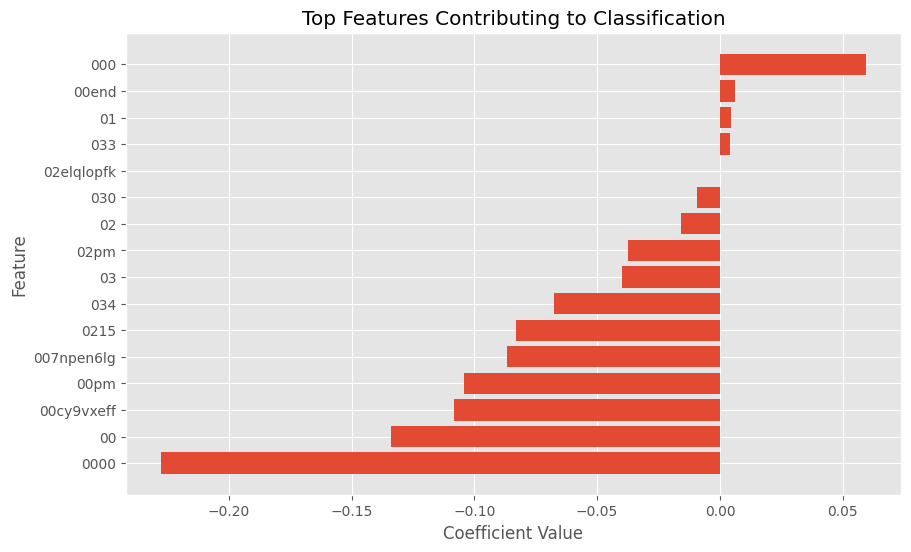

In [66]:
# Get feature names from the vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get coefficients from the trained logistic regression model
coefficients = lrn.coef_[0]

# Sort feature coefficients
sorted_coefficients_indices = coefficients.argsort()

# Plot top N features with the highest coefficients
top_n = min(20, len(feature_names))  # Ensure top_n does not exceed the number of features available
top_coefficients = coefficients[sorted_coefficients_indices[-top_n:]]
top_feature_names = [feature_names[i] for i in sorted_coefficients_indices[-top_n:]]

print("top_n:", top_n)
print("len(feature_names):", len(feature_names))
print("len(top_coefficients):", len(top_coefficients))
print("len(top_feature_names):", len(top_feature_names))

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_coefficients)), top_coefficients, align='center')
plt.yticks(range(len(top_coefficients)), top_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top Features Contributing to Classification')
plt.grid(True)
plt.show()


Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate classifier
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6986211424819435


top_n: 20
len(top_feature_importances): 16
len(top_feature_names): 16


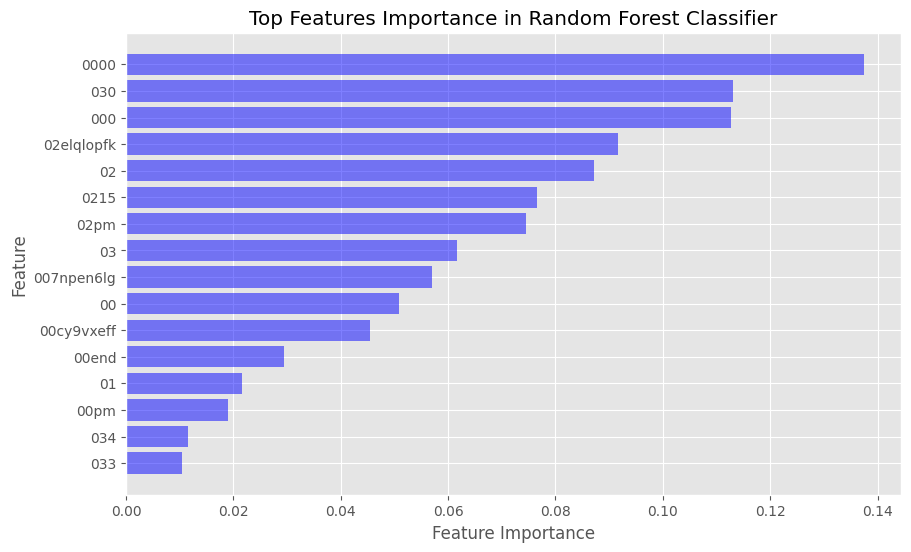

In [68]:
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = rfc.feature_importances_

# Sort feature importances
sorted_indices = feature_importances.argsort()

# Plot top N features with the highest importances
top_n = min(20, len(feature_names))  # Ensure top_n does not exceed the number of features available
top_feature_importances = feature_importances[sorted_indices[-top_n:]]
top_feature_names = [feature_names[i] for i in sorted_indices[-top_n:]]

print("top_n:", top_n)
print("len(top_feature_importances):", len(top_feature_importances))
print("len(top_feature_names):", len(top_feature_names))

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_importances)), top_feature_importances, align='center', alpha=0.5, color = 'blue')
plt.yticks(range(len(top_feature_importances)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Importance in Random Forest Classifier')
plt.grid(True)
plt.show()


Neural Networks

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

X = df['text']  
y = df['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data (convert text into numerical features)
vectorizer = CountVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Convert sparse matrix to NumPy array
X_train_vec = X_train_vec.toarray()
X_test_vec = X_test_vec.toarray()

# Define a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))  # Input layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the train-test split approach
history = model.fit(X_train_vec, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_vec, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')




Epoch 1/10


172/172 [==============================] - 2s 4ms/step - loss: 0.5822 - accuracy: 0.6942 - val_loss: 0.4551 - val_accuracy: 0.7931
Epoch 2/10
172/172 [==============================] - 1s 4ms/step - loss: 0.4272 - accuracy: 0.8070 - val_loss: 0.4392 - val_accuracy: 0.7980
Epoch 3/10
172/172 [==============================] - 1s 3ms/step - loss: 0.3653 - accuracy: 0.8449 - val_loss: 0.4559 - val_accuracy: 0.7931
Epoch 4/10
172/172 [==============================] - 1s 4ms/step - loss: 0.3248 - accuracy: 0.8657 - val_loss: 0.4783 - val_accuracy: 0.8095
Epoch 5/10
172/172 [==============================] - 1s 4ms/step - loss: 0.2771 - accuracy: 0.8843 - val_loss: 0.4843 - val_accuracy: 0.7915
Epoch 6/10
172/172 [==============================] - 1s 5ms/step - loss: 0.2435 - accuracy: 0.9073 - val_loss: 0.5207 - val_accuracy: 0.7915
Epoch 7/10
172/172 [==============================] - 1s 5ms/step - loss: 0.2061 - accuracy: 0.9206 - val_loss: 0.5655 - val_accuracy: 0.8013
Ep

●	Train each model using the training data and evaluate their performance using cross-validation techniques

Defining Text vectorization and Model pipelines

Train and Evaluate models using Cross validation

In [70]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Define text vectorization
vectorizer = CountVectorizer(max_features=1000)  

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier()
}

# Define pipelines with MaxAbsScaler (to scale sparse input without centering)
pipelines = {
    name: make_pipeline(vectorizer, MaxAbsScaler(), model) 
    for name, model in models.items()
}

# Prepare text data
X_text = df['text']
y = df['target']

# Perform cross-validation for each model
for name, pipeline in pipelines.items():
    print(f"Training and evaluating {name}...")
    scores = cross_val_score(pipeline, X_text, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {np.mean(scores):.4f}\n")


Training and evaluating Logistic Regression...
Cross-validation scores: [0.68417597 0.58699934 0.64281024 0.63272011 0.73390276]
Mean accuracy: 0.6561

Training and evaluating Support Vector Machine...
Cross-validation scores: [0.69796454 0.60078792 0.66250821 0.63534823 0.74507227]
Mean accuracy: 0.6683

Training and evaluating Random Forest...
Cross-validation scores: [0.72554169 0.62442548 0.65331582 0.69053876 0.72536137]
Mean accuracy: 0.6838

Training and evaluating Multi-layer Perceptron...
Cross-validation scores: [0.6671044  0.55022981 0.6093237  0.60840999 0.6892247 ]
Mean accuracy: 0.6249



●	Optimize hyperparameters of the selected models using techniques like grid search or random search.

Define Hyperparameter Grids for Grid search or Random search

In [58]:
# Define hyperparameter grids for each model with correct step names
param_grids = {
    'Logistic Regression': {
        'logisticregression__C': [0.1, 1.0, 10.0]
    },
    'Support Vector Machine': {
        'svc__C': [0.1, 1.0, 10.0],
        'svc__gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 10, 20]
    },
    'Multi-layer Perceptron': {
        'mlpclassifier__hidden_layer_sizes': [(100,), (200,), (300,)]
    }
}



Performing Grid search or Random search for each model

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Perform hyperparameter optimization for each model using GridSearchCV
for name, pipeline in pipelines.items():
    param_grid = param_grids[name]
    
    print(f"Optimizing hyperparameters for {name}...")
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    search.fit(X_train, y_train)
    
    print("Best parameters:", search.best_params_)
    print("Best cross-validation accuracy: {:.4f}".format(search.best_score_))
    
    # Evaluate the best model on test data
    best_model = search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Test accuracy: {:.4f}\n".format(test_accuracy))



Optimizing hyperparameters for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'logisticregression__C': 1.0}
Best cross-validation accuracy: 0.7901
Test accuracy: 0.7899

Optimizing hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__C': 1.0, 'svc__gamma': 'scale'}
Best cross-validation accuracy: 0.7962
Test accuracy: 0.7965

Optimizing hyperparameters for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 200}
Best cross-validation accuracy: 0.7745
Test accuracy: 0.7800

Optimizing hyperparameters for Multi-layer Perceptron...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'mlpclassifier__hidden_layer_sizes': (200,)}
Best cross-validation accuracy: 0.7662
Test accuracy: 0.7722



Optimizing hyperparameters for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'logisticregression__C': 1.0}
Best cross-validation accuracy: 0.7901
Test accuracy: 0.7899

Optimizing hyperparameters for Support Vector Machine...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'svc__C': 1.0, 'svc__gamma': 'scale'}
Best cross-validation accuracy: 0.7962
Test accuracy: 0.7965

Optimizing hyperparameters for Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 100}
Best cross-validation accuracy: 0.7768
Test accuracy: 0.7866

Optimizing hyperparameters for Multi-layer Perceptron...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'mlpclassifier__hidden_layer_sizes': (300,)}
Best cross-validation accuracy: 0.7631
Test accuracy: 0.7748



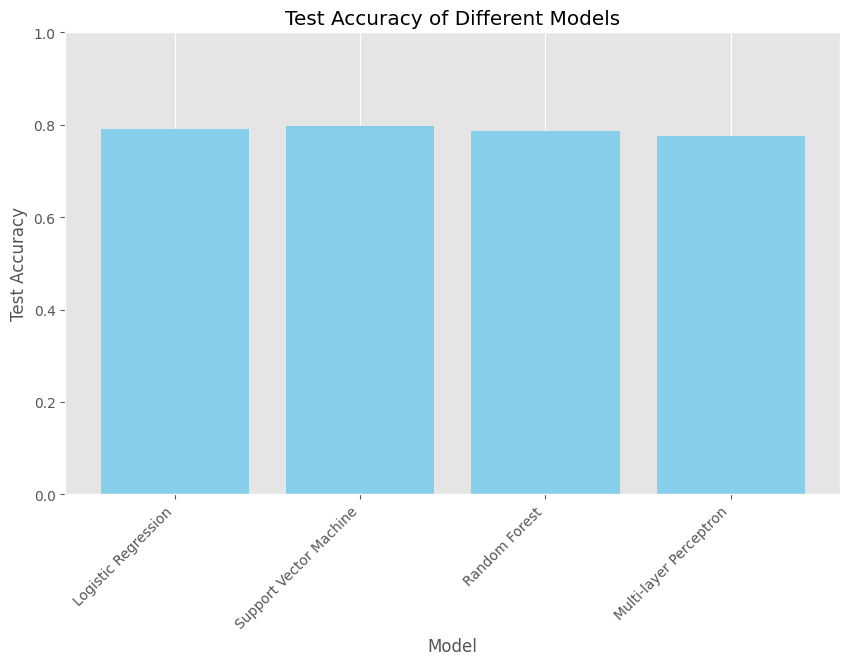

In [60]:
# Initialize lists to store model names and their corresponding test accuracies
model_names = []
test_accuracies = []

# Perform hyperparameter optimization for each model using GridSearchCV
for name, pipeline in pipelines.items():
    param_grid = param_grids[name]
    
    print(f"Optimizing hyperparameters for {name}...")
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
    search.fit(X_train, y_train)
    
    print("Best parameters:", search.best_params_)
    print("Best cross-validation accuracy: {:.4f}".format(search.best_score_))
    
    # Evaluate the best model on test data
    best_model = search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print("Test accuracy: {:.4f}\n".format(test_accuracy))
    
    # Append model name and test accuracy to lists
    model_names.append(name)
    test_accuracies.append(test_accuracy)

# Plotting test accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


The accuracy of all 4 models are almost same but Logistic Regression is the best model in this dataset

Saving all the models in pkl files

In [ ]:
import joblib

# Save the trained logistic regression model
joblib.dump(Logistic Regression, 'logistic_regression_model.pkl')

# Save the trained random forest model
joblib.dump(Random Forest Classifier, 'random_forest_model.pkl')

# Save the trained TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


In [57]:
df.to_csv('twitter_disaster_task3.csv')